In [1]:
import  time
import  numpy as np
from    config          import *
from    agent           import Agent
from    enviroment      import Enviroment
from    IPython.display import clear_output
from    matplotlib      import pyplot as plt

In [2]:
grid_size = GRID_SIZE
num_col = grid_size

possibleActions = POSSIBLE_ACTIONS

action_space_dict = {
    "U" : 0,
    "D" : 1,
    "L" : 2,
    "R" : 3,
    "S" : 4
}
n_agents          = N_AGENTS
allplayerpos      = PLAYER_POS[: n_agents]
enemy_list_pos    = ENEMY_POS[: n_agents]
batch_size        = BATCH_SIZE
replay_memory_len = REPLAY_MEMORY_LEN
type = "sticky"

In [3]:
def decode_state(state_num):
    return int(state_num/num_col), state_num%num_col

def state_encode(row,col):
    return row*num_col + col 

In [4]:
all_agents = []
for i in range(0, N_AGENTS):
    all_agents.append(Agent(i, allplayerpos[i], type = type))


initial_states = []
for agent in all_agents:
    initial_states.append(state_encode(agent.x, agent.y))

enemy_states = []
for enemy_pos in enemy_list_pos:
    enemy_states.append(state_encode(enemy_pos[0], enemy_pos[1]))
print(initial_states, enemy_states)
env = Enviroment(initial_states = initial_states, enemy_states = enemy_states, type = type)
env.render()

[0] [24]
--------------------------------------------
P	-	-	-	-	

-	-	-	-	-	

-	-	-	-	-	

-	-	-	-	-	

-	-	-	-	X	

--------------------------------------------


In [5]:
all_agents[0].print_summary()

model summary
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 49, 49, 64)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 128)       32896     
_________________________________________________________________
flatten (Flatten)            (None, 294912)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               37748864  
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 132       
Total params: 37,786,340
Trainable params: 37,786,340
Non-trainable params: 0
______________________________

In [6]:
# plt.imshow(env.map_image)[0]
env.map_image.shape

(1, 50, 50, 1)

In [7]:
[new_map, _, _] = env.reset()

In [8]:
env.enemy_states

[24]

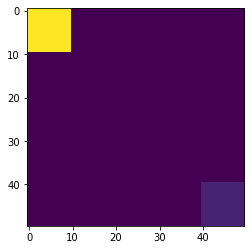

In [23]:
[old_map, _, _] = env.reset()
plt.imshow(old_map[0])

[-1] [False]


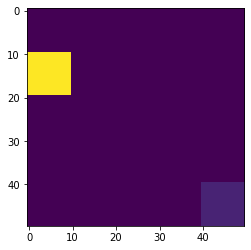

In [24]:
[map_image, new_states, rewards, terminal]=env.step("D")
print(rewards, terminal)
plt.imshow(map_image[0])
plt.show()